> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

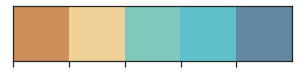

In [50]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
# Color palette
my_colors = ["#ce8f5a", "#efd199", "#80c8bc", "#5ec0ca", "#6287a2"]
sns.palplot(sns.color_palette(my_colors))

# Set Style
sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

> getting to know more about our dataset by knowing its shape, info, describtion, data types   

In [16]:
df.shape

(110527, 14)

In [17]:
df.info()     # seems there is no missing data 
              # looks like we need to change some data types 
              #e.x ==> ScheduledDay, AppointmentDay needs to be date time     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [18]:
# Converting data columns to the right data type

df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [19]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> so by looking at the result of "df.describe()" we saw some of the most repetitive problems in most of the data sets that is :

- we have in the "Age" column a wrong input age (-1) and an outlier (115)
- both the mean and median is equal which is famous indecator that the data is   not skewed.
- seems like both "PatientId" & "AppointmentID" don't have that useful data to extract from 

> We also have a lot of column features that is in binary format,So we'll need them in our analysis 
> PatentID and AppointmentID seems to me useless information that will not help us in our analysis. 

In [20]:
less_zero = df[df['Age'] <=0]

outlier = df[df['Age'] > 100]

less_zero.shape[0], outlier.shape[0]

(3540, 7)

> With the outliers we only hve 7 data points which is not that a big problem, 
   for the negative and zero we seem that we've a major problem as we have a      lot of data points that is either negative "which we need to change to zero   or drop them " and we've a lot of zero aged that we need to know the cause for that. 

In [21]:
#dropping negative values

df = df[ df['Age'] >= 0 ]

In [48]:
counts =lambda a: df[a].value_counts()
counts("Age")

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [22]:
# Now we need to check if how many of our ScheduledDay column is unique to 
#cut it into years months , and days
df.ScheduledDay.nunique()

103548

In [23]:
#Extracing Year, Month, Day, and Hour from Scheduled Day datetime attribute
df["Scheduled_Year"] = df.ScheduledDay.dt.year
df['Scheduled_Month'] = df.ScheduledDay.dt.month
df['Scheduled_Week'] = df.ScheduledDay.dt.week
df['Scheduled_Day'] = df.ScheduledDay.dt.day
df['Scheduled_Hour'] = df.ScheduledDay.dt.hour

<ipython-input-23-98eb3865328e>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Scheduled_Week']= df.ScheduledDay.dt.week


In [27]:
df.drop(['PatientId', 'AppointmentID'], axis= 1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Year,Scheduled_Month,Scheduled_Week,Scheduled_Day,Scheduled_Hour
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,17,29,18
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,17,29,16
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,17,29,16
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,17,29,17
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,17,29,16


Text(0.5, 1.0, 'Scheduled Year dist')

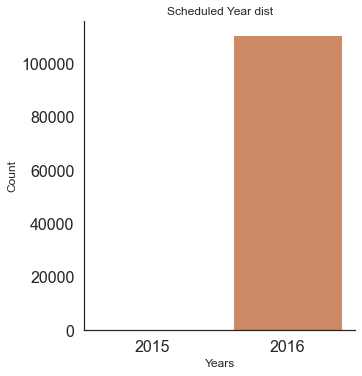

In [51]:
sns.catplot(x='Scheduled_Year', data=df, kind='count'); # seems most of the data collected were in 2016 
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Scheduled Year dist")

In [30]:
# get the count betuween the two dates to know ecatly the difference 
df.Scheduled_Year.value_counts()

2016    110464
2015        62
Name: Scheduled_Year, dtype: int64

> As I will need to do some relation comparision between some of my feature columns I will make small lambda funaction that will help me do that easily 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What is the most feature to have correlation between No-show and    other features ?

In [31]:
# takes 2 param and returns a new small data frame

lam = lambda x,y : df.groupby([df[x],df[y]], as_index=False).size() 

In [56]:
x = lam("Gender", "No-show")
x.head()

,Gender,No-show,size
0,F,No,57245
1,F,Yes,14594
2,M,No,30962
3,M,Yes,7725


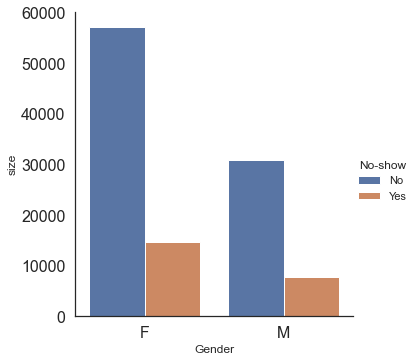

In [60]:
sns.catplot(x="Gender", y="size",
                hue="No-show",
                data=x, kind="bar");
# It seems that the most gender recorded is female so we can't conclude that its either the highr not to show or to show 

In [69]:
p = lam("No-show", 'Handcap')
p

,No-show,Handcap,size
0,No,0,86373
1,No,1,1676
2,No,2,146
3,No,3,10
4,No,4,2
5,Yes,0,21912
6,Yes,1,366
7,Yes,2,37
8,Yes,3,3
9,Yes,4,1


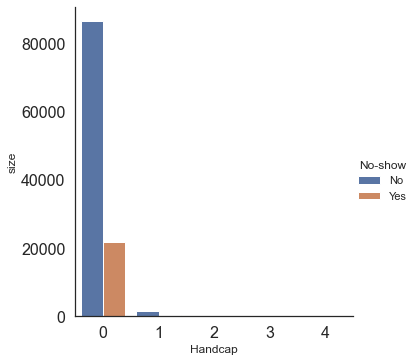

In [67]:
sns.catplot(x="Handcap", y="size",
                hue="No-show",
                data=p, kind="bar");
# Most of our collected data is handcap = 0, but also seems that most of them is nearly to show. 

In [70]:
z = lam("No-show", 'SMS_received')
z

,No-show,SMS_received,size
0,No,0,62509
1,No,1,25698
2,Yes,0,12535
3,Yes,1,9784


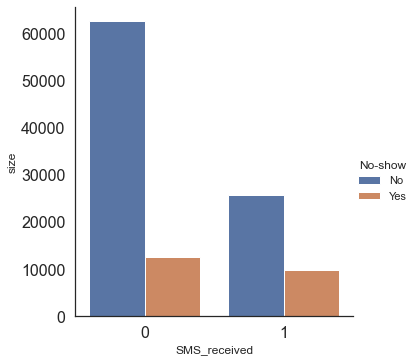

In [72]:
sns.catplot(x="SMS_received", y="size",
                hue="No-show",
                data=z, kind="bar");


In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!